In [ ]:
# Importing necessary libraries for EDA and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the data file(s) using pandas
completeclean = pd.read_excel("Finalcompletecleandata.xlsx")
completeclean.shape
completeclean.drop(columns=["Unnamed: 0","Ease_of_Business",'Key'],inplace=True)
df_clusterinput=completeclean
# clusterbase=completeclean
grouped_data = df_clusterinput.groupby('Country').mean()
df_clusterinput.head()


,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Country,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp__GDP,Health_Exp_Capita,Hours_to_do_Tax,...,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020,48.966901,87931.0,Algeria,39.999418,26998.000000,5.479006e+10,0.035,60.0,302.068503,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0
1,0.050,48.966901,9542.0,Angola,39.999418,7499.000000,9.129595e+09,0.034,22.0,302.068503,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0
2,0.043,48.966901,1617.0,Benin,39.999418,1983.000000,2.359122e+09,0.043,15.0,302.068503,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0
3,0.027,48.966901,4276.0,Botswana,39.999418,1836.000000,5.788312e+09,0.047,152.0,302.068503,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0
4,0.046,48.966901,1041.0,Burkina Faso,39.999418,77236.840896,2.610959e+09,0.051,12.0,302.068503,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0


In [ ]:




# Group the data by 'Country' and calculate the mean for each column


# # Create a new DataFrame with the same column names
# new_data = pd.DataFrame(columns=df_clusterinput.columns)

# # Populate the new dataset with the mean values for each country
# for country, data in grouped_data.iterrows():
#     new_row = data.copy()
#     new_row['Country'] = country
#     new_data = new_data.append(new_row, ignore_index=True)

# # Print the new dataset
# new_data.head()
# df_clusterinput=new_data

In [ ]:
df_clusterinput.drop(columns=['Country'],inplace=True)

In [ ]:
df_clusterinput.head()
df_clusterinput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2704 non-null   float64
 1   Business_Tax_Rate       2704 non-null   float64
 2   CO2_Emissions           2704 non-null   float64
 3   Days_to_Start_Business  2704 non-null   float64
 4   Energy_Usage            2704 non-null   float64
 5   GDP                     2704 non-null   float64
 6   Health_Exp__GDP         2704 non-null   float64
 7   Health_Exp_Capita       2704 non-null   float64
 8   Hours_to_do_Tax         2704 non-null   float64
 9   Infant_Mortality_Rate   2704 non-null   float64
 10  Internet_Usage          2704 non-null   float64
 11  Lending_Interest        2704 non-null   float64
 12  Life_Expectancy_Female  2704 non-null   float64
 13  Life_Expectancy_Male    2704 non-null   float64
 14  Mobile_Phone_Usage      2704 non-null   

In [ ]:
# df_clusterinput = df_clusterinput[['GDP', 'Energy_Usage']]
df_clusterinput = df_clusterinput[['GDP','Tourism_Inbound','Energy_Usage',"Tourism_Outbound","Population_Total"]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling
df_clusterinput_standardized = scaler.fit_transform(df_clusterinput)

# Convert the standardized data array back to a DataFrame
df_clusterinput_standardized = pd.DataFrame(df_clusterinput_standardized, columns=df_clusterinput.columns)
n_clusters =3

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

def Agglomerative_clustering(dfstd, n_clusters):
    # Perform Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clusters = pd.Series(model.fit_predict(dfstd))

    # Plot dendrogram
    Z = linkage(dfstd, method='ward')
    # plt.figure(figsize=(12, 6))
    # dendrogram(Z)
    # plt.title('Agglomerative Clustering Dendrogram')
    # plt.xlabel('Sample Index')
    # plt.ylabel('Distance')
    # plt.show()

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(dfstd, clusters)
    print("The Agglomerative Clustering average silhouette score is:", round(silhouette_avg,2))

    return clusters

In [ ]:
aglocluster=Agglomerative_clustering(df_clusterinput_standardized,3)
np.unique(aglocluster)

The Agglomerative Clustering average silhouette score is: 0.92


array([0, 1, 2])

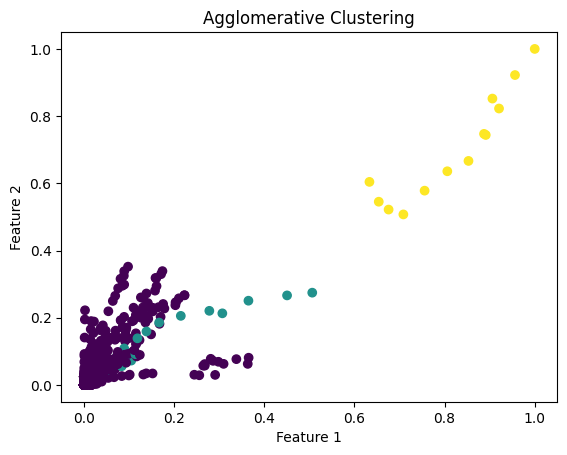

In [ ]:
# df_clusterinput_standardized['df_clusterinput_standardized']
plt.scatter(df_clusterinput_standardized.values[:,0], df_clusterinput_standardized.values[:,1], c=aglocluster)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

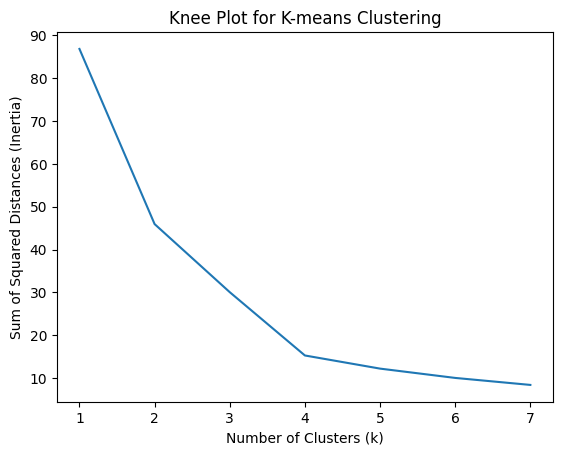

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def kmean_clustering_knee(dfstd,max_c):
# Calculate inertia for different values of k
    max_clusters=max_c
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k,init="k-means++",random_state=42)
        kmeans.fit(dfstd.values)
        inertia.append(kmeans.inertia_)

    # Plot the knee plot
    plt.plot(range(1, max_clusters + 1), inertia)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances (Inertia)')
    plt.title('Knee Plot for K-means Clustering')
    plt.show()

kmean_clustering_knee(df_clusterinput_standardized,7)

In [ ]:
from sklearn.cluster import KMeans

def preform_KMeanClustering(dfstd,max_c):

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=max_c,init="k-means++",random_state=42)
    kmeanclusters = kmeans.fit_predict(df_clusterinput_standardized)

    # Create a new column 'Cluster' in your DataFrame
    # df_clusterinput_standardized['Cluster'] = clusters

    from sklearn.metrics import silhouette_score
    # Calculate the silhouette score
    kmeansilhouette_avg = silhouette_score(dfstd, kmeanclusters)

    # Print the silhouette score
    print("The kmean average silhouette score is:", round(kmeansilhouette_avg,2))
    return kmeanclusters,kmeans

In [ ]:
Y,kmeans = preform_KMeanClustering(df_clusterinput_standardized,3)

# Access the centroids of the clusters
centroids = kmeans.cluster_centers_
np.unique(Y)

The kmean average silhouette score is: 0.92


array([0, 1, 2], dtype=int32)

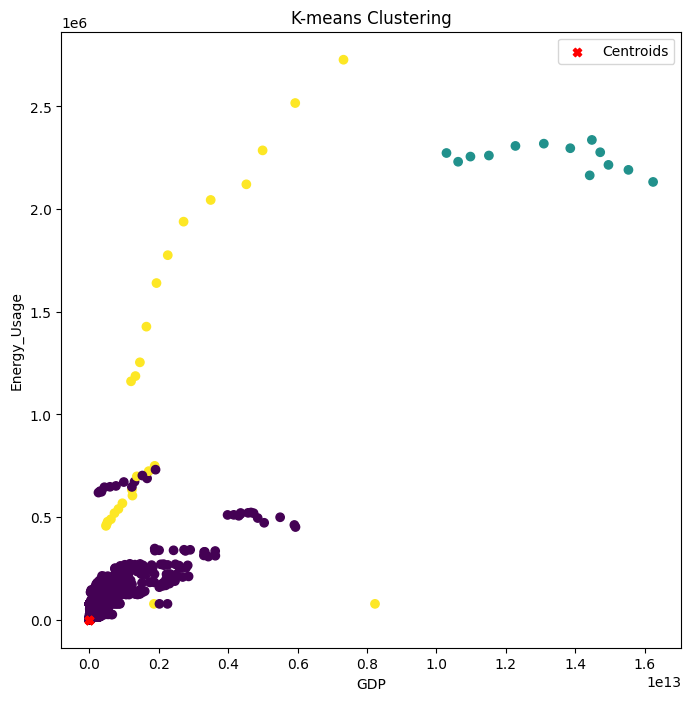

In [ ]:
plt.figure(figsize=(8, 8))
# Scatter plot of the data points colored by cluster labels
plt.scatter(df_clusterinput['GDP'], df_clusterinput['Energy_Usage'], c=Y, cmap='viridis')
plt.xlabel('GDP')
plt.ylabel('Energy_Usage')
plt.title('K-means Clustering')

# Plot the centroids
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', marker='X', label='Centroids')
plt.legend()

plt.show()

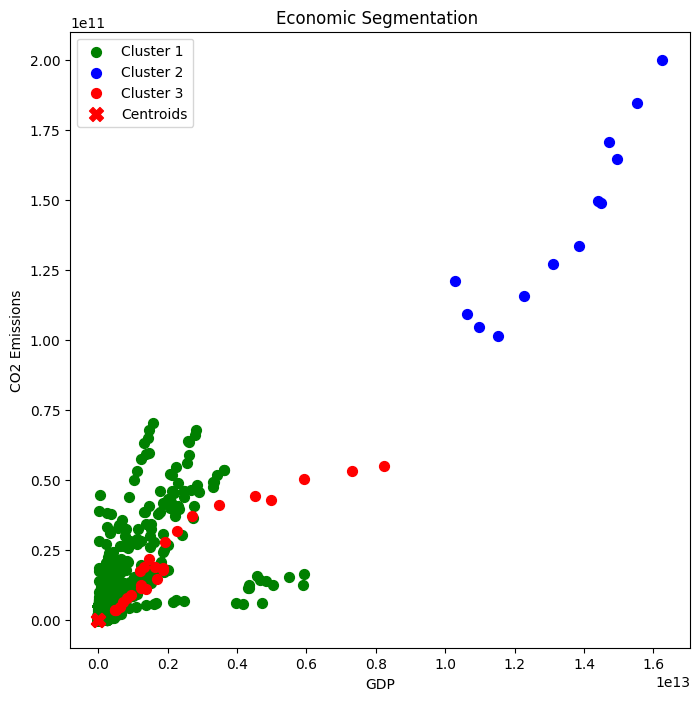

In [ ]:
X = df_clusterinput[['GDP','Tourism_Inbound','Energy_Usage',"Tourism_Outbound","Population_Total"]].values
# X = df_clusterinput[['Health_Exp__GDP', 'Tourism_Inbound', 'Tourism_Outbound',"Lending_Interest"]].values
plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='red', label='Cluster 3')
# Add more scatter plots for additional clusters if necessary
plt.scatter(centroids[:, 0], centroids[:, 1],s=100, c='red', marker='X', label='Centroids')
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.title('Economic Segmentation ')
plt.legend()
plt.show()

profiling the clusters 1. Cluster Sizes:

In [ ]:
completeclean=pd.read_excel("Finalcompletecleandata.xlsx")
# completeclean=clusterbase

completeclean['cluster']=Y
completeclean['cluster'].value_counts()
completeclean.to_excel('clustereddAta.xlsx')


In [ ]:
# n_clusters = 4  # Get the number of unique clusters

# Create a list to store the unique country names for each cluster
cluster_countries = [[] for _ in range(n_clusters)]

# Iterate over the dataframe to extract country names for each cluster
for cluster in range(n_clusters):
    countries = completeclean.loc[completeclean['cluster'] == cluster, 'Country'].unique().tolist()
    cluster_countries[cluster] = countries

# Print the unique country names for each cluster
for cluster, countries in enumerate(cluster_countries):
    print(f'Cluster {cluster}: {countries}')


Cluster 0: ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo Dem. Rep.', 'Congo Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'Georgia', 'Hong Kong SAR China', 'Indonesia', 'Japan', 'Kazakhstan', 'Korea Dem. Rep.', 'Korea Rep.', 'Kyrgyz Republic', 'Lao PDR', 'Macao SAR China', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Pakistan', '

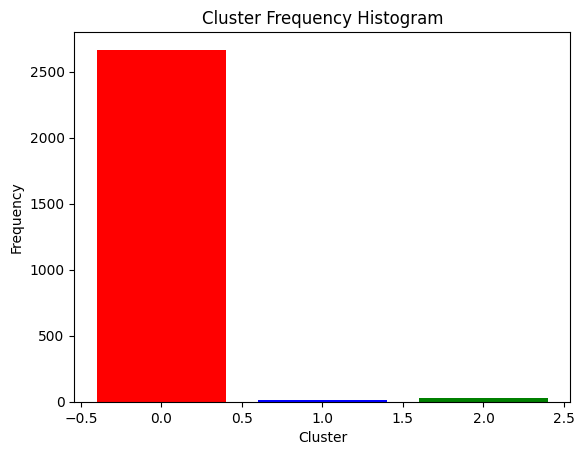

In [ ]:

# Count the frequency of each cluster
cluster_counts = completeclean['cluster'].value_counts()

# Define the colors for each cluster
colors = ['red', 'green', 'blue']

# Plot the histogram with colored bars
plt.bar(cluster_counts.index, cluster_counts.values, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Cluster Frequency Histogram')
plt.show()


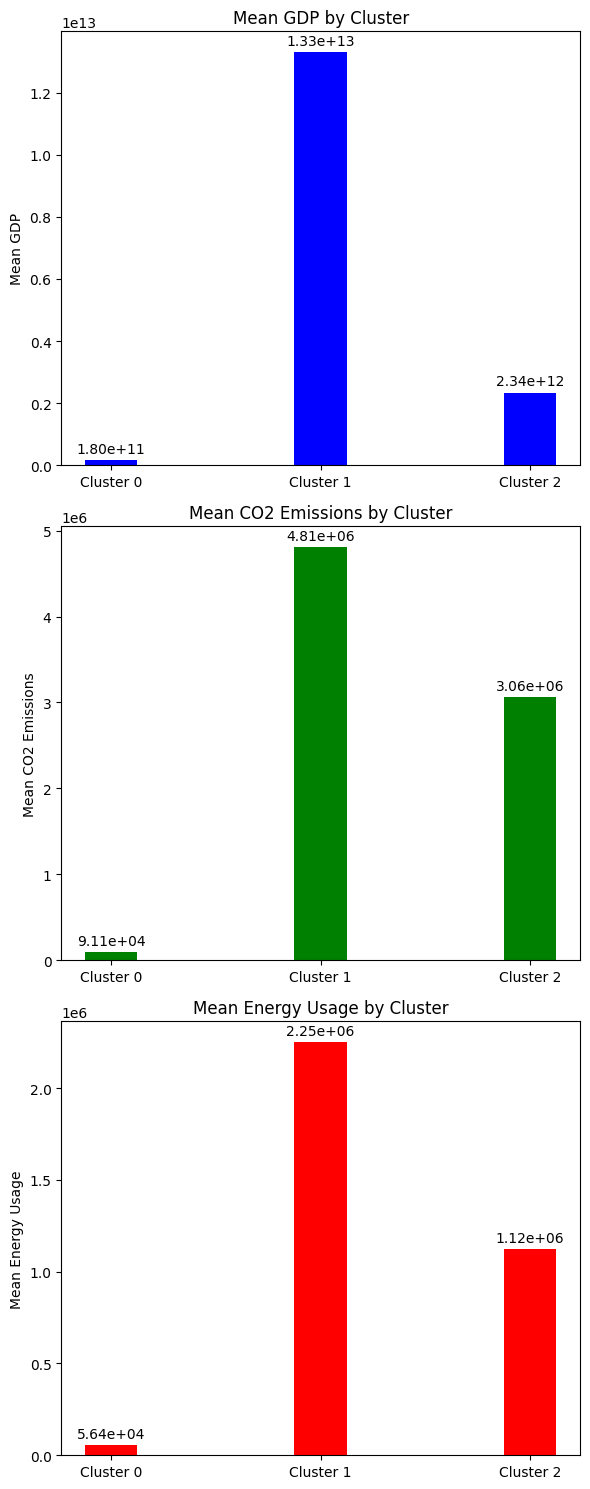

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# n_clusters = 4

# Calculate mean values for each cluster group
gdp_mean = [completeclean.loc[completeclean['cluster'] == i, 'GDP'].mean() for i in range(n_clusters)]
co2_mean = [completeclean.loc[completeclean['cluster'] == i, 'CO2_Emissions'].mean() for i in range(n_clusters)]
energy_mean = [completeclean.loc[completeclean['cluster'] == i, 'Energy_Usage'].mean() for i in range(n_clusters)]


# Set the cluster labels
cluster_labels = [f'Cluster {i}' for i in range(n_clusters)]

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
x = np.arange(len(cluster_labels))

# Set the colors for each feature
colors = ['b', 'g', 'r']

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 15))

# Plot GDP
rects1 = ax1.bar(x, gdp_mean, bar_width, color=colors[0])
ax1.set_ylabel('Mean GDP')
ax1.set_title('Mean GDP by Cluster')
ax1.set_xticks(x)
ax1.set_xticklabels(cluster_labels)

# Plot CO2 emissions
rects2 = ax2.bar(x, co2_mean, bar_width, color=colors[1])
ax2.set_ylabel('Mean CO2 Emissions')
ax2.set_title('Mean CO2 Emissions by Cluster')
ax2.set_xticks(x)
ax2.set_xticklabels(cluster_labels)

# Plot energy usage
rects3 = ax3.bar(x, energy_mean, bar_width, color=colors[2])
ax3.set_ylabel('Mean Energy Usage')
ax3.set_title('Mean Energy Usage by Cluster')
ax3.set_xticks(x)
ax3.set_xticklabels(cluster_labels)

# Add value labels on top of the bars
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2e}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)
autolabel(rects3, ax3)

# Adjust spacing between subplots
fig.tight_layout()

# Show the chart
plt.show()


**Cluster Characteristics**

In [ ]:
import pandas as pd

# n_clusters = 4

# Create a list to store the unique country names for each cluster
cluster_countries = [[] for _ in range(n_clusters)]

# Iterate over the dataframe to extract country names for each cluster
for cluster in range(n_clusters):
    countries = completeclean.loc[completeclean['cluster'] == cluster, 'Country'].unique().tolist()
    cluster_countries[cluster] = countries

# Create a DataFrame to store the country labels
country_labels = pd.DataFrame({'Country': [], 'Label': []})

# Assign labels to each country based on the cluster
if(n_clusters ==3):
    for cluster, countries in enumerate(cluster_countries):
        label = ""
        if cluster == 0:
            label = "underdeveloped"
        elif cluster == 1:
            label = "developed"
        elif cluster == 2:
            label = "developing"
        elif cluster == 2:
            label = "developing"

        data = pd.DataFrame({'Country': countries, 'Label': label})
        country_labels = pd.concat([country_labels, data], ignore_index=True)
else:
  for cluster, countries in enumerate(cluster_countries):
        label = ""
        if cluster == 0:
            label = 'Low GDP'
        elif cluster == 1:
            label = 'Medium-Low GDP'
        elif cluster == 2:
            label = 'High GDP'
        elif cluster == 3:
            label = 'Medium-High GDP'
        data = pd.DataFrame({'Country': countries, 'Label': label})
        country_labels = pd.concat([country_labels, data], ignore_index=True)

# Print the DataFrame with country labels
country_labels
country_labels.to_excel("labeleddata.xlsx")


In [ ]:
# country_counts = country_labels['Country'].value_counts()

# # Get the countries that are repeating (have count > 1)
# repeating_countries = country_counts[country_counts > 1].index.tolist()

# # Print the repeating countries
# print("Repeating Countries:", len(repeating_countries))
# for country in repeating_countries:
#      print(country_labels[country_labels['Country']==country])





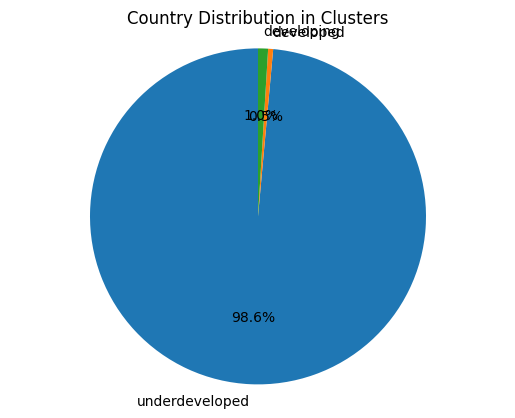

In [ ]:
import matplotlib.pyplot as plt

# n_clusters = 4

# Create a list to store the unique country names for each cluster
cluster_countries = [[] for _ in range(n_clusters)]

# Iterate over the dataframe to extract country names for each cluster
for cluster in range(n_clusters):
    countries = completeclean.loc[completeclean['cluster'] == cluster, 'Country'].unique().tolist()
    cluster_countries[cluster] = countries

# Get the count of countries in each cluster
cluster_counts = [len(countries) for countries in cluster_countries]

# Define cluster labels
cluster_labels = country_labels['Label'].unique().tolist()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(cluster_counts, labels=cluster_labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title('Country Distribution in Clusters')

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.axis('equal')

# Display the chart
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

def performDBSCAN(eps,min_samples,dfstd):
    # eps = 0.5  # Epsilon, neighborhood radius
    # min_samples = 3  # Minimum number of samples in a neighborhood

    # Create DBSCAN object and fit the data
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscanclusters = dbscan.fit_predict(dfstd)  # Exclude the last column (target variable) from clustering

    # # Add the cluster labels back to the DataFrame
    # df_clusterinput['Cluster'] = clusters

    from sklearn.metrics import silhouette_score
    # Calculate the silhouette score
    dbscansilhouette_avg = silhouette_score(dfstd, dbscanclusters)

    # Print the silhouette score
    print("The DBSCAN silhouette score is:", dbscansilhouette_avg)
    return dbscanclusters

In [ ]:
performDBSCAN(0.1,2,df_clusterinput_standardized)


The DBSCAN silhouette score is: 0.7441786291836222


array([0, 0, 0, ..., 0, 0, 0])

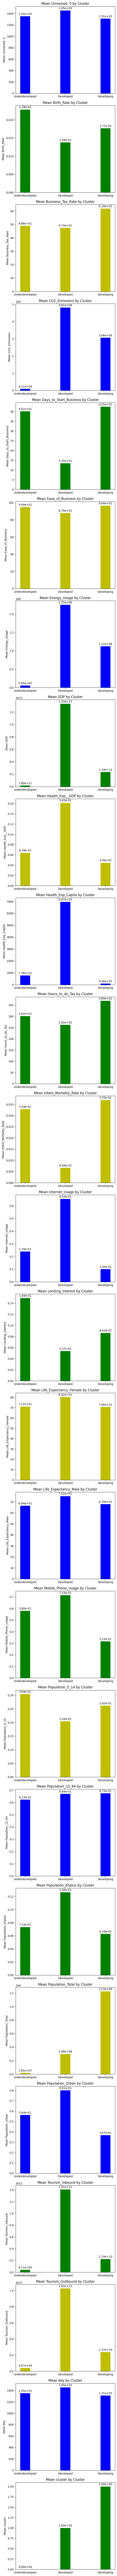

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Get the list of column names from the dataframe excluding "Country"
columns = [col for col in completeclean.columns if col != "Country"]

# Set the cluster labels
cluster_labels = [f'Cluster {i}' for i in range(n_clusters)]

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
x = np.arange(len(cluster_labels))

# Set the colors for each feature
colors = ['b', 'g', 'y']

# Create subplots dynamically based on the number of columns
fig, axes = plt.subplots(len(columns), 1, figsize=(6, 5 * len(columns)))

# Iterate over each column
for i, col in enumerate(columns):
    ax = axes[i]

    # Calculate mean values for the current column and cluster dynamically
    col_means = [completeclean.loc[completeclean['cluster'] == j, col].mean() for j in range(n_clusters)]
    # Set the cluster labels
    cluster_labels = ['Underdeveloped', 'Developed', 'Developing']
    # Plot the bar chart
    rects = ax.bar(x, col_means, bar_width, color=colors[i % len(colors)])
    ax.set_ylabel(f'Mean {col}')
    ax.set_title(f'Mean {col} by Cluster')
    ax.set_xticks(x)
    ax.set_xticklabels(cluster_labels)

    # Add value labels on top of the bars
    def autolabel(rects, ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2e}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom')

    autolabel(rects, ax)

# Adjust spacing between subplots
fig.tight_layout()

# Show the chart
plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np


# # Get the list of column names from the dataframe excluding "Country"
# columns = [col for col in completeclean.columns if col != "Country"]

# # Set the cluster labels
# cluster_labels = [f'Cluster {i}' for i in range(n_clusters)]

# # Set the bar width
# bar_width = 0.25

# # Set the positions of the bars on the x-axis
# x = np.arange(len(cluster_labels))

# # Set the colors for each feature
# colors = ['b', 'g', 'y']

# # Create a dictionary to store mean values for each column
# mean_data = {}

# # Iterate over each column
# for i, col in enumerate(columns):
#     # Calculate mean values for the current column and cluster dynamically
#     col_means = [completeclean.loc[completeclean['cluster'] == j, col].mean() for j in range(n_clusters)]

#     # Store the mean values in the dictionary
#     mean_data[col] = col_means

#     # Create subplots dynamically based on the number of columns
#     fig, ax = plt.subplots()

#     # Plot the bar chart
#     rects = ax.bar(x, col_means, bar_width, color=colors[i % len(colors)])
#     ax.set_ylabel(f'Mean {col}')
#     ax.set_title(f'Mean {col} by Cluster')
#     ax.set_xticks(x)
#     ax.set_xticklabels(cluster_labels)

#     # Add value labels on top of the bars
#     def autolabel(rects, ax):
#         for rect in rects:
#             height = rect.get_height()
#             ax.annotate(f'{height:.2e}', xy=(rect.get_x() + rect.get_width() / 2, height),
#                         xytext=(0, 3), textcoords='offset points',
#                         ha='center', va='bottom')

#     autolabel(rects, ax)

#     # Save the bar chart as an image (optional)
#     chart_filename = f'{col}_chart.png'
#     plt.savefig(chart_filename)

#     # Clear the current figure to create a new one for the next iteration
#     plt.clf()

# # Create a DataFrame from the mean data dictionary
# df_mean = pd.DataFrame(mean_data)

# # Export the DataFrame to an Excel file
# excel_filename = 'mean_data.xlsx'
# df_mean.to_excel(excel_filename, index=False)

# # Show the chart
# plt.show()
